### Unsupervised Learning: Iris Clustering with KMeans + PCA


In [1]:
%pip install -q scikit-learn matplotlib pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [13]:
def iris_kmeans_clustering():
    print("Iris KMeans Clustering Example")
    print("=" * 40)
    print()

    # Step 1: Load data
    print("Step 1: Loading the data (no labels used for training)...")
    data_path = "/Users/vignesh/Documents/GitHub/Generative_ai/Datasets/neural_networks/Iris.csv"
    data = pd.read_csv(data_path)
    features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    X = data[features]
    y_true = data['Species']  # only for evaluation after clustering
    print(f" Loaded {len(X)} samples with {len(features)} features")
    print()

    # Step 2: Standardize features
    print("Step 2: Standardizing features...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(" Features standardized (mean ~0, variance ~1)")
    print()

    # Step 3: Choose k via simple heuristic and silhouette (optional)
    print("Step 3: Choosing number of clusters (k=3 for Iris)...")
    k = 3
    print(f" Using k = {k}")
    print()

    # Step 4: Fit KMeans
    print("Step 4: Fitting KMeans...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia = kmeans.inertia_
    sil = silhouette_score(X_scaled, cluster_labels)
    print(f" Inertia: {inertia:.2f}")
    print(f" Silhouette score: {sil:.4f}")
    print()

    # Step 5: Inspect cluster centroids (in standardized space)
    print("Step 5: Cluster centers (standardized feature space):")
    centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)
    print(centers_df.round(3))
    print()

    # Step 6: Simple mapping of clusters to species (for sanity check)
    print("Step 6: Mapping clusters to most frequent species (post-hoc)...")
    results = pd.DataFrame({
        'cluster': cluster_labels,
        'species': y_true.values
    })
    mapping = results.groupby('cluster')['species'].agg(lambda s: s.value_counts().idxmax())
    print(" Cluster -> species mapping (majority vote):")
    print(mapping.to_string())
    print()

    # Step 7: PCA visualization (2D)
    print("Step 7: Visualizing clusters with PCA (2 components)...")
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(9, 6))
    for c in range(k):
        mask = cluster_labels == c
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, alpha=0.7, label=f"Cluster {c}")
    plt.title('Iris KMeans Clusters (PCA projection)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(alpha=0.3)

    out_path = '/Users/vignesh/Documents/GitHub/Generative_ai/Machine Learning/iris_kmeans_pca.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f" PCA scatter saved to: {out_path}")
    print()

    print("🎉 Unsupervised example completed!")
    print("=" * 40)
    print("Key takeaways:")
    print("1. Unsupervised learning finds structure without labels")
    print("2. Standardize features for distance-based methods like KMeans")
    print("3. Use metrics like silhouette and PCA plots to assess clusters")
    print()


Elbow Method: computing inertias for k=1..10 ...


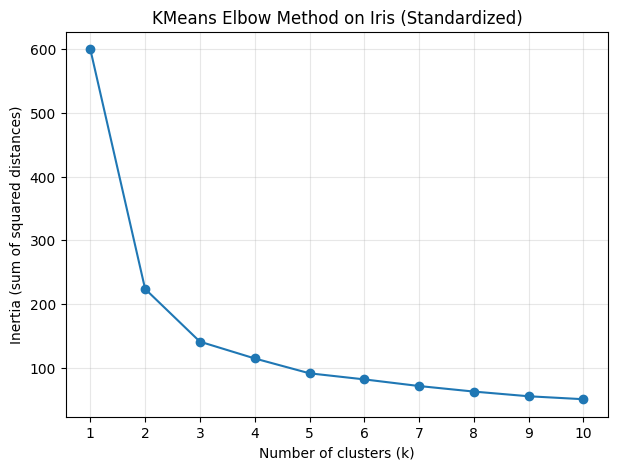

 Elbow plot saved to: /Users/vignesh/Documents/GitHub/Generative_ai/Machine Learning/iris_kmeans_elbow.png


In [9]:
# Elbow method: plot inertia vs number of clusters (k)
print("Elbow Method: computing inertias for k=1..10 ...")

# Load and scale once (same as in function)
data_path = "/Users/vignesh/Documents/GitHub/Generative_ai/Datasets/neural_networks/Iris.csv"
data = pd.read_csv(data_path)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ks = list(range(1, 11))
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(ks, inertias, marker='o')
plt.xticks(ks)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('KMeans Elbow Method on Iris (Standardized)')
plt.grid(alpha=0.3)

elbow_path = '/Users/vignesh/Documents/GitHub/Generative_ai/Machine Learning/iris_kmeans_elbow.png'
plt.savefig(elbow_path, dpi=300, bbox_inches='tight')
plt.show()
print(f" Elbow plot saved to: {elbow_path}")


Iris KMeans Clustering Example

Step 1: Loading the data (no labels used for training)...
 Loaded 150 samples with 4 features

Step 2: Standardizing features...
 Features standardized (mean ~0, variance ~1)

Step 3: Choosing number of clusters (k=3 for Iris)...
 Using k = 3

Step 4: Fitting KMeans...
 Inertia: 140.97
 Silhouette score: 0.4590

Step 5: Cluster centers (standardized feature space):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         -0.050        -0.880          0.348         0.282
1         -1.015         0.842         -1.305        -1.255
2          1.136         0.097          0.996         1.017

Step 6: Mapping clusters to most frequent species (post-hoc)...
 Cluster -> species mapping (majority vote):
cluster
0    Iris-versicolor
1        Iris-setosa
2     Iris-virginica

Step 7: Visualizing clusters with PCA (2 components)...


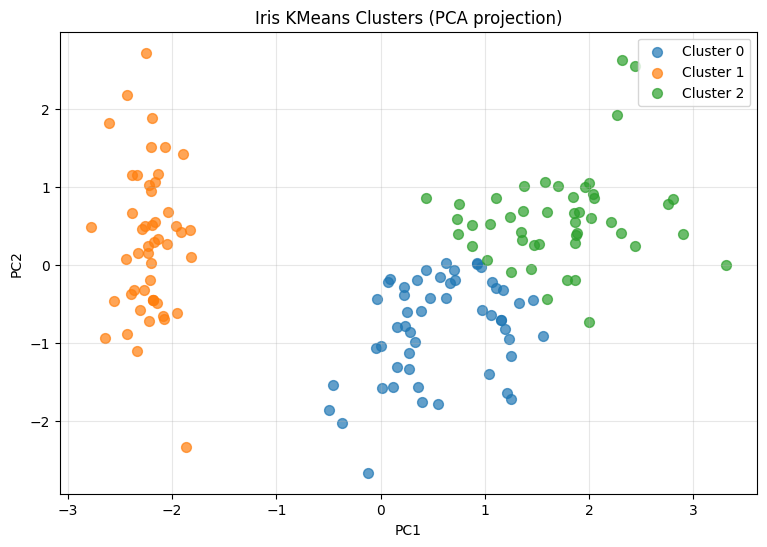

 PCA scatter saved to: /Users/vignesh/Documents/GitHub/Generative_ai/Machine Learning/iris_kmeans_pca.png

🎉 Unsupervised example completed!
Key takeaways:
1. Unsupervised learning finds structure without labels
2. Standardize features for distance-based methods like KMeans
3. Use metrics like silhouette and PCA plots to assess clusters



In [14]:
# Run the unsupervised example
iris_kmeans_clustering()
